# 1. Importing Dependencies

In [66]:
import numpy as np
import pandas as pd

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer # As we cant give textual data to the model so we have to convert the textual data into numerical data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# 2. Data Loading and Understanding

In [4]:
column_headers = ['Target', 'Id', 'Date-Time', 'Flag', 'User', 'Text']
df = pd.read_csv('twiter_sentiment.csv', encoding='ISO-8859-1', header=None, names=column_headers)

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# *Sentiment Analysis on a dataset of around 1.6 Million Twitter Tweets*

In [85]:
df.shape

(1600000, 7)

In [87]:
df.sample(5)

,Target,Id,Date-Time,Flag,User,Text,stemmed_text
1536255,1,2179220969,Mon Jun 15 08:48:37 PDT 2009,NO_QUERY,eve214,Omg work in the afternoon sigh!! I Wanna go to...,omg work afternoon sigh wanna go citi island t...
65235,0,1690897533,Sun May 03 16:37:48 PDT 2009,NO_QUERY,HollyAnn09,is going to bed watching pinocchio ...because ...,go bed watch pinocchio im bk work tomorrow
1248686,1,1995892926,Mon Jun 01 14:12:40 PDT 2009,NO_QUERY,roguemouse,@Lee_Nox ...it's a gift. Makes me wonder what ...,lee nox gift make wonder els convinc sinist gr...
656315,0,2240405136,Fri Jun 19 09:42:24 PDT 2009,NO_QUERY,TrishieAnn,YEAH it's FRIDAY at last!! Its gonna rain all...,yeah friday last gonna rain weekend make sad
238522,0,1980431326,Sun May 31 06:43:29 PDT 2009,NO_QUERY,gehroll,UGH had the worst sleep ever i have a major ha...,ugh worst sleep ever major hangov bodi feel he...


# 3. Exploratory Data Analysis

In [16]:
df.isnull().sum()

Target       0
Id           0
Date-Time    0
Flag         0
User         0
Text         0
dtype: int64

In [18]:
df.replace({'Target':{4:1}}, inplace = True)

In [20]:
df['Target'].value_counts()

Target
0    800000
1    800000
Name: count, dtype: int64

In [22]:
# Reducing all the words to it's Root Word
port_stem = PorterStemmer()

In [91]:
def stemming(content):
    new_stem = re.sub('[^a-zA-Z]', ' ', content)
    new_stem = new_stem.lower()
    new_stem = new_stem.split()
    new_stem = [port_stem.stem(word) for word in new_stem if not word in stopwords.words('english')]
    new_stem = ' '.join(new_stem)
    return new_stem

In [26]:
df['stemmed_text'] = df['Text'].apply(stemming)

In [28]:
df.head()

,Target,Id,Date-Time,Flag,User,Text,stemmed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [30]:
print(df['stemmed_text'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_text, Length: 1600000, dtype: object


# 4. Converting Textual data into Numerical using TfidfVectorizer

In [38]:
vectorizer = TfidfVectorizer()

In [40]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [41]:
print(x_test)

  (0, 6138)	0.49266620633844205
  (0, 65858)	0.724860705672608
  (0, 155094)	0.30476900817080577
  (0, 274567)	0.3727905821805048
  (1, 19512)	0.3487441976093634
  (1, 74016)	0.2723970726590324
  (1, 246205)	0.6210729678126399
  (1, 305395)	0.5952886374123374
  (1, 383729)	0.25313460107372376
  (2, 54106)	0.19397022475781744
  (2, 99331)	0.2830945888464492
  (2, 117308)	0.2159797167580701
  (2, 143010)	0.1854594483108216
  (2, 145344)	0.2262841511612535
  (2, 150895)	0.18686001906471258
  (2, 162240)	0.2220207408561772
  (2, 198784)	0.30350616010265585
  (2, 201803)	0.15099805184381426
  (2, 207533)	0.2609110495748858
  (2, 214695)	0.13681872277040022
  (2, 264111)	0.18745801925221567
  (2, 339894)	0.31873150265848066
  (2, 373235)	0.4880130323784405
  (2, 374180)	0.14465541225713455
  (2, 402625)	0.2612539762101122
  :	:
  (479996, 355486)	0.42909441314932684
  (479997, 2781)	0.5437225634806151
  (479997, 103666)	0.3426835508718109
  (479997, 128528)	0.269533423776464
  (479997, 21469

# 5. Splitting the Train and Test Data

In [32]:
x = df.iloc[:,-1].values
y = df.iloc[:,0].values

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 6. Modelling

In [43]:
logistic = LogisticRegression()

In [52]:
logistic.fit(x_train, y_train)

LogisticRegression()

In [54]:
y_train_pred = logistic.predict(x_train)

In [56]:
y_test_pred = logistic.predict(x_test)

# 7. Model Evaluation

## 7a. For Known Data

In [95]:
print('Accuracy Score for Trained data is: ', accuracy_score(y_train, y_train_pred))

Accuracy Score for Trained data is:  0.8040678571428571


In [97]:
print('Confusion Matrix for Trained Data:\n ', confusion_matrix(y_train, y_train_pred))

Confusion Matrix for Trained Data:
  [[438302 122337]
 [ 97107 462254]]


In [99]:
print('Classification Report for Trained Data:\n ', classification_report(y_train, y_train_pred))

Classification Report for Trained Data:
                precision    recall  f1-score   support

           0       0.82      0.78      0.80    560639
           1       0.79      0.83      0.81    559361

    accuracy                           0.80   1120000
   macro avg       0.80      0.80      0.80   1120000
weighted avg       0.80      0.80      0.80   1120000



## 7b. For Unknown Data

In [101]:
print('Accuracy Score for Test data is: ', accuracy_score(y_test, y_test_pred))

Accuracy Score for Test data is:  0.77693125


In [103]:
print('Confusion Matrix for Test Data:\n ', confusion_matrix(y_test, y_test_pred))

Confusion Matrix for Test Data:
  [[181221  58140]
 [ 48933 191706]]


In [105]:
print('Classification Report for Test Data:\n ', classification_report(y_test, y_test_pred))

Classification Report for Test Data:
                precision    recall  f1-score   support

           0       0.79      0.76      0.77    239361
           1       0.77      0.80      0.78    240639

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000



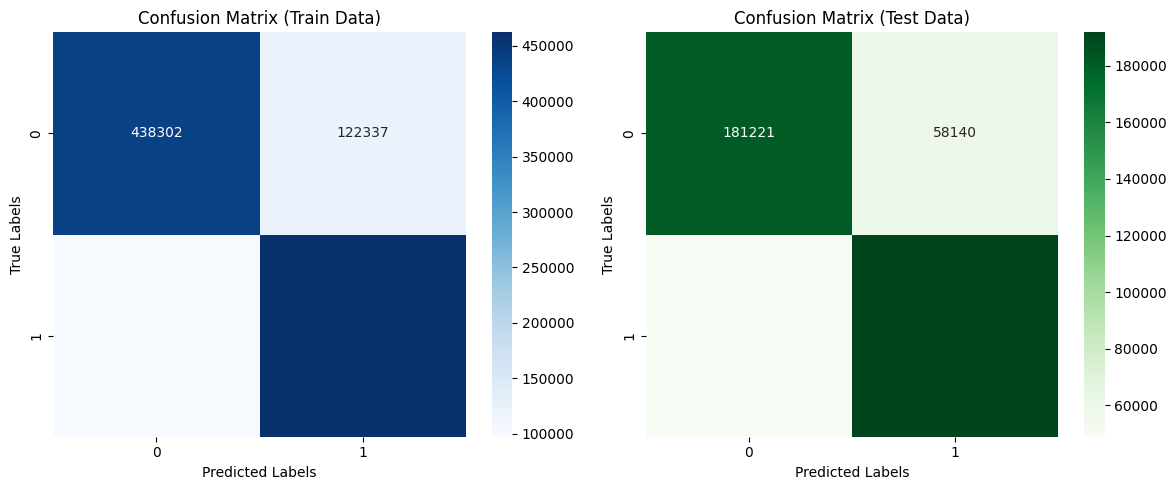

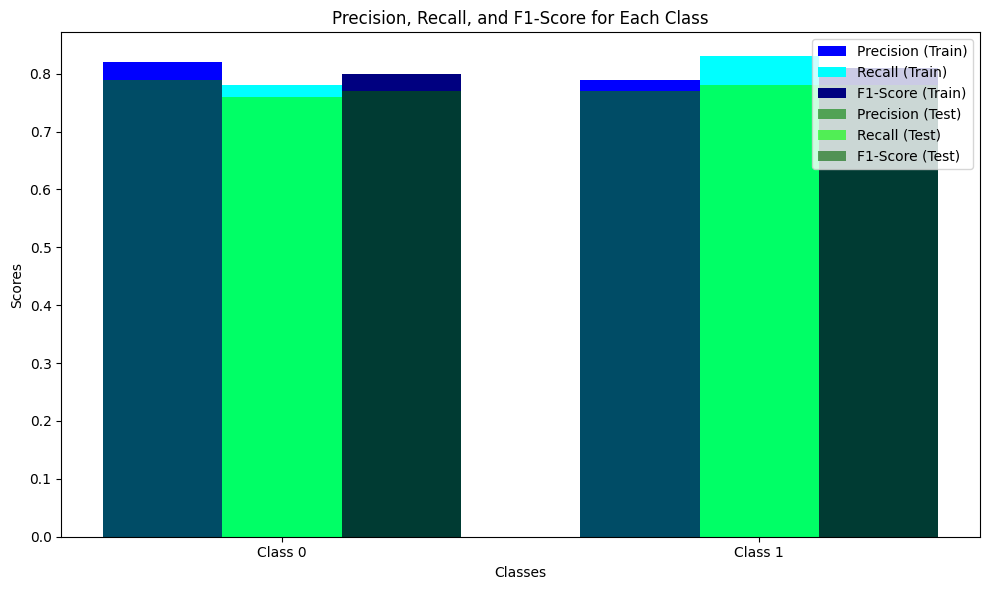

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variables from the image
# Confusion Matrices
cm_train = [[438302, 122337], [97107, 462254]]  # Known data
cm_test = [[181221, 58140], [48933, 191760]]    # Unknown data

# Metrics for Known Data (Train)
metrics_train = {
    "precision": [0.82, 0.79],
    "recall": [0.78, 0.83],
    "f1-score": [0.80, 0.81],
    "labels": ["Class 0", "Class 1"]
}

# Metrics for Unknown Data (Test)
metrics_test = {
    "precision": [0.79, 0.77],
    "recall": [0.76, 0.78],
    "f1-score": [0.77, 0.78],
    "labels": ["Class 0", "Class 1"]
}

# --- Plot Confusion Matrix Heatmaps ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Train Data)")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Confusion Matrix (Test Data)")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

# --- Plot Precision, Recall, and F1-Score Bar Charts ---
x = np.arange(len(metrics_train["labels"]))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Train Metrics
ax.bar(x - width, metrics_train["precision"], width, label='Precision (Train)', color='blue')
ax.bar(x, metrics_train["recall"], width, label='Recall (Train)', color='cyan')
ax.bar(x + width, metrics_train["f1-score"], width, label='F1-Score (Train)', color='navy')

# Test Metrics
ax.bar(x - width, metrics_test["precision"], width, label='Precision (Test)', color='green', alpha=0.6)
ax.bar(x, metrics_test["recall"], width, label='Recall (Test)', color='lime', alpha=0.6)
ax.bar(x + width, metrics_test["f1-score"], width, label='F1-Score (Test)', color='darkgreen', alpha=0.6)

# Customization
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.set_xticks(x)
ax.set_xticklabels(metrics_train["labels"])
ax.legend()

plt.tight_layout()
plt.show()
